In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [11]:
data = pd.read_csv('GOOGL.csv')

In [12]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [13]:
# Data preprocessing
data['Date'] = data.index
data.set_index('Date', inplace=True)

In [14]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [15]:
# Create sequences for the LSTM model
seq_length = 30
sequences = []
target = []
for i in range(len(data) - seq_length):
    sequences.append(data['Close'].values[i:i+seq_length])
    target.append(data['Close'].values[i+seq_length])

X = np.array(sequences)
y = np.array(target)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
110/110 [==============================] - 8s 20ms/step - loss: 0.0018
Epoch 2/100
110/110 [==============================] - 2s 19ms/step - loss: 2.4580e-05
Epoch 3/100
110/110 [==============================] - 2s 19ms/step - loss: 2.2812e-05
Epoch 4/100
110/110 [==============================] - 2s 19ms/step - loss: 2.3087e-05
Epoch 5/100
110/110 [==============================] - 2s 19ms/step - loss: 2.1624e-05
Epoch 6/100
110/110 [==============================] - 2s 19ms/step - loss: 2.2924e-05
Epoch 7/100
110/110 [==============================] - 2s 19ms/step - loss: 2.4867e-05
Epoch 8/100
110/110 [==============================] - 2s 19ms/step - loss: 2.1810e-05
Epoch 9/100
110/110 [==============================] - 2s 19ms/step - loss: 2.0763e-05
Epoch 10/100
110/110 [==============================] - 2s 19ms/step - loss: 2.3586e-05
Epoch 11/100
110/110 [==============================] - 2s 20ms/step - loss: 1.9929e-05
Epoch 12/100
110/110 [=======================

In [19]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 7.532456947956234e-06
Testing Loss: 0.00012903493188787252


In [20]:
# Make predictions
y_pred = model.predict(X_test)

28/28 [==============================] - 1s 9ms/step


In [21]:
# Inverse transform the scaled predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

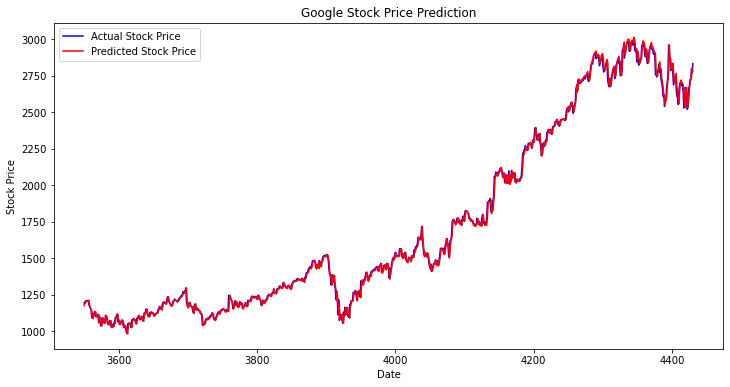

In [22]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Stock Price', color='b')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Stock Price', color='r')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.show()

#### Comparison of Actual and Predicted Prices: The blue line represents the actual stock prices over time, while the red line represents the predicted stock prices generated by the LSTM model.

#### Accuracy Assessment:
By visually comparing the actual and predicted prices, you can get a sense of how well the model has performed in capturing the trends and patterns in the data. If the red line closely follows the blue line, it indicates a relatively accurate prediction.

#### Short-Term vs. Long-Term Trends: 
The plot can help you observe both short-term and long-term trends in the stock prices. It allows you to see how well the model predicts not only the overall movement but also fluctuations and variations over time.

#### Performance Evaluation:
You can assess the model's performance by observing how closely the red line aligns with the blue line. If the red line deviates significantly from the blue line, it may indicate that the model is struggling to make accurate predictions.

#### Model Limitations: 
Keep in mind that stock price prediction is a challenging task, and even with sophisticated models, it's difficult to predict prices with high accuracy due to the many unpredictable factors affecting stock markets.

#### Model Improvement:
If the predicted prices deviate from the actual prices, this could be an opportunity to refine the model, adjust hyperparameters, or explore more advanced techniques to improve prediction accuracy.